In [59]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings('ignore')

Id - an Id that represents a (Store, Date) duple within the test set \
Store - a unique Id for each store\
Sales - the turnover for any given day (this is what you are predicting)\
Customers - the number of customers on a given day\
Open - an indicator for whether the store was open: 0 = closed, 1 = open\
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None\
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools\
StoreType - differentiates between 4 different store models: a, b, c, d\
Assortment - describes an assortment level: a = basic, b = extra, c = extended\
CompetitionDistance - distance in meters to the nearest competitor store\
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened\
Promo - indicates whether a store is running a promo on that day\
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating\
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2\
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store \

In [61]:
train = pd.read_csv('../data/train_store_combined.csv')
test = pd.read_csv('../data/test_store_combined.csv')

In [62]:
def isWeekend(x):
    if x<6:
        return 0
    else: 
        return 1
train["weekend"]= train["DayOfWeek"].apply(isWeekend )

In [63]:
def startMidEndMonth(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    else:
        return 2

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   Year                       1017209 non-null  int64  
 10  Month                      1017209 non-null  int64  
 11  Day                        1017209 non-null  int64  
 12  StoreType                  1017209 non-null  object 
 13  Assortment  

In [65]:
train["MonthState"]=train["Day"].apply(startMidEndMonth)

In [66]:
import bisect
train["Date"]=pd.to_datetime(train["Date"])
dates=np.array(train[train["StateHoliday"]!="0"]["Date"].unique())
dates=np.sort(dates)
a=train["Date"].iloc[119]

index = bisect.bisect(dates, a)
print(index,dates[index-1],dates[index],a)

32 2015-04-03T00:00:00.000000000 2015-04-06T00:00:00.000000000 2015-04-03 00:00:00


In [67]:
def datToAndAfterHoliday(df,Column,holidays):
    to=[]
    after=[]
    for a in df[Column]:
        index=bisect.bisect(holidays,a)
        if len(holidays)==index:
            to.append(pd.Timedelta(0, unit='d') )
            after.append(a - holidays[index-1])
        else:
            after.append(holidays[index] - a)
            to.append(a -holidays[index-1])
    return to,after

In [68]:
train["To"],train["After"]=datToAndAfterHoliday(train,"Date",dates)

In [69]:
# train['Promo2SinceWeek'] = train['Promo2SinceWeek'].fillna(train['Promo2SinceWeek'].max())
# train['Promo2SinceYear'] = train['Promo2SinceYear'].fillna(train['Promo2SinceYear'].max())
# train['PromoInterval'] = train['PromoInterval'].fillna(train['PromoInterval'].mode().iloc[0])

# train['CompetitionDistance'] = train['CompetitionDistance'].fillna(train['CompetitionDistance'].max())
# train['CompetitionOpenSinceMonth'] = train['CompetitionOpenSinceMonth'].fillna(train['CompetitionOpenSinceMonth'].mode().iloc[0])
# train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].fillna(train['CompetitionOpenSinceYear'].mode().iloc[0])

In [70]:
# train.to_csv("../data/test_store_combined.csv",index=False)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype          
---  ------                     --------------    -----          
 0   Store                      1017209 non-null  int64          
 1   DayOfWeek                  1017209 non-null  int64          
 2   Date                       1017209 non-null  datetime64[ns] 
 3   Sales                      1017209 non-null  int64          
 4   Customers                  1017209 non-null  int64          
 5   Open                       1017209 non-null  int64          
 6   Promo                      1017209 non-null  int64          
 7   StateHoliday               1017209 non-null  object         
 8   SchoolHoliday              1017209 non-null  int64          
 9   Year                       1017209 non-null  int64          
 10  Month                      1017209 non-null  int64          
 11  Day                     

In [72]:
# train_cleaned_ready=train.copy()

In [73]:
# train_cleaned_ready["To"]=pd.to_numeric(train_cleaned_ready['To'].dt.days, downcast='integer')

In [74]:
train["To"]=pd.to_numeric(train['To'].dt.days, downcast='integer')

In [75]:
train["After"]=pd.to_numeric(train['After'].dt.days, downcast='integer')

In [76]:
# train_cleaned_ready["After"]=pd.to_numeric(train_cleaned_ready['After'].dt.days, downcast='integer')

In [77]:
# train_cleaned_ready.drop(["Store","Date","Customers"],axis=1,inplace=True)

In [78]:
# def encode_scale_features(df,columns):
#     lb=LabelEncoder()
#     norm = StandardScaler()
#     for i in columns:
#         df[i]=lb.fit_transform(df[i])   
#     norm_fit = norm.fit_transform(df)
#     out=pd.DataFrame(norm_fit,columns=df.columns)
#     return out

In [79]:
# features=encode_scale_features(train_cleaned_ready,["StoreType","StateHoliday","Assortment","PromoInterval"])

In [80]:
# y=features["Sales"]

In [81]:
# features=features.drop("Sales",axis=1,inplace=False)

In [82]:


import sys, os

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from Create_modelss_modified import CreateModel



In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error

In [85]:
# X_train, X_test, y_train, y_test = train_test_split(
#    features, y, test_size=0.4, random_state=1)

In [86]:

# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name="Baseline_LinearRegression"):
#     model=LinearRegression()
#     model.fit(X_train, y_train)

#     pred = model.predict(X_test)
    
#     error=mean_squared_error(y_test,pred)
#     print(error)

In [87]:
# linearmodel=CreateModel(X_train=X_train,X_test=X_test, y_train=y_train,y_test=y_test,data_version="v1",name="LinearRegressionModel",model=LinearRegression)

In [88]:
# linearmodel.train()


In [89]:
# params = {'fit_intercept': [True,False],'normalize':[True,False]}

# linearmodel.hyperParameterTune(5,search_space=params)

In [90]:
# from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# regressionModel=CreateModel(X_train=X_train,X_test=X_test, y_train=y_train,y_test=y_test,data_version="v1",name="RandomForestRegressorModel",model=RandomForestRegressor)  




In [91]:
# regressionModel.train()

In [92]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
class CustomMaxImputer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=0):
        self.fill_value  = X.max()
        return self
    def transform(self, X,y=0):
        return np.where(X.isna(), self.fill_value, X)

        
    # def fit(self, X, y=None):
        
    #     impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
    #                                                         .reset_index(drop=False)
        
    #     self.impute_map_ = impute_map
        
    #     return self 
    
    # def transform(self, X, y=None):
        
    #     # make sure that the imputer was fitted
    #     check_is_fitted(self, 'impute_map_')
        
    #     X = X.copy()
        
    #     for index, row in self.impute_map_.iterrows():
    #         ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
    #         X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
    #     return X.values

In [93]:
# train_cleaned_ready.columns

In [94]:
# train = pd.read_csv('../data/train_store_combined.csv')


y = train[['Sales']]
X = train.drop(['Sales',"Customers","Store","Date"], axis=1)

In [95]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [96]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [97]:
def optimize_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
       A simple function which optimizes the data types of the dataframe and returns it
        Parameters
        ----------
        dataframe:
            Type: pd.DataFrame

        Returns
        -------
        pd.DataFrame
    """
    data_types = dataframe.dtypes
    optimizable = ['float64', 'int64']
    for col in data_types.index:
        if(data_types[col] in optimizable):
            if(data_types[col] == 'float64'):
                # downcasting a float column
                dataframe[col] = pd.to_numeric(
                    dataframe[col], downcast='float')
            elif(data_types[col] == 'int64'):
                # downcasting an integer column
                dataframe[col] = pd.to_numeric(
                    dataframe[col], downcast='unsigned')

    return dataframe

In [98]:
# X=optimize_df(X)

In [99]:
test=CustomMaxImputer().fit_transform(X[["Promo2SinceWeek","CompetitionDistance","Promo2SinceYear"]])

In [100]:
test.shape

(1017209, 3)

In [101]:
# t2=categorical_transformer.fit_transform(X[['StateHoliday', 'PromoInterval', 'Assortment','StoreType']])

In [102]:
# t2.shape

In [103]:
# nu=numeric_transformer.fit_transform(X[['DayOfWeek', 'Open',"Promo","SchoolHoliday","Year","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","weekend","MonthState","To","After","Month","Day","Promo2"]])

In [104]:
# nu.shape

In [105]:
# y=StandardScaler().fit_transform(y)

In [106]:
numeric_features = ['DayOfWeek', 'Open',"Promo","SchoolHoliday","Year","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","weekend","MonthState","To","After","Month","Day","Promo2"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())])

max_features=["Promo2SinceWeek","CompetitionDistance","Promo2SinceYear"]
max_transformenr=Pipeline(steps=[
    ('imputer', CustomMaxImputer()),
    ('scaler', StandardScaler())]
)

categorical_features = ['StateHoliday', 'PromoInterval', 'Assortment','StoreType']

categorical_transformer =Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
    ]) 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('max', max_transformenr, max_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)




# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name="Baseline_LinearRegression"):
        
#     clf = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', LinearRegression())])
#     clf.fit(X_train, y_train)

#     pred = clf.predict(X_test)
#     error=mean_squared_error(y_test,pred)

# print("mean_squared_error of model is ",error)


In [107]:
# import math
# math.sqrt(error)

In [108]:
# clf.score(X_test,y_test)

In [109]:
# result_df = X_test.copy()
# result_df["Prediction Sales"] = pred
# result_df["Actual Sales"] = y_test
# result_df["Store"]=test["Store"]
# result_agg = result_df.groupby("Store").agg({"Prediction Sales": "mean", "Actual Sales":"mean"})
        
    
def pred_graph(res_dataframe):
    
    fig = plt.figure(figsize=(18, 5))
    sns.lineplot(x = res_dataframe.index, y = res_dataframe["Actual Sales"], label='Actual')
    sns.lineplot(x = res_dataframe.index, y = res_dataframe["Prediction Sales"], label='Prediction')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel="Day", fontsize=16)
    plt.ylabel(ylabel="Sales", fontsize=16)
    plt.show()

In [110]:
# pred_graph(result_agg)

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [155]:


# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name="Baseline_RandomForest"):
        
#     clf = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', RandomForestRegressor(n_estimators=15))])
#     clf.fit(X_train, y_train)

#     pred = clf.predict(X_test)
#     error=mean_squared_error(y_test,pred)
    
#     mlflow.log_metric("mean_squared_error", error)

# print("mean_squared_error of model is ",error)


In [113]:
# result_df = X_test.copy()
# result_df["Prediction Sales"] = pred
# result_df["Actual Sales"] = y_test
# result_df["Store"]=test["Store"]
# result_agg = result_df.groupby("Day").agg({"Prediction Sales": "mean", "Actual Sales":"mean"})

# pred_graph(result_agg)

In [114]:

# result_month_agg = result_df.groupby("Month").agg({"Prediction Sales": "mean", "Actual Sales":"mean"})

# pred_graph(result_month_agg)

In [115]:

# from sklearn.metrics import mean_absolute_error


# mean_absolute_error(y_test,pred)

In [120]:
import pickle

In [119]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
mlflow.sklearn.autolog()
param_grid = {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [5, 6, 7, 8],
    'classifier__max_features': [2, 3],
    'classifier__min_samples_leaf': [3, 4, 5],
    'classifier__min_samples_split': [4, 5, 6],
    'classifier__n_estimators': [8, 10, 15]
}
with mlflow.start_run(run_name="Hyperparameter_RandomForest"):
        
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestRegressor())])

    grid=GridSearchCV(clf,
                    param_grid=param_grid,
                    cv=2,
                    refit=True)

    grid.fit(X_train, y_train)

    pred = grid.predict(X_test)
    error=mean_squared_error(y_test,pred)
    
    mlflow.log_metric("mean_squared_error", error)

print("mean_squared_error of model is ",error)




2021/07/31 10:56:26 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpute...`
2021/07/31 11:53:19 INFO mlflow.sklearn.utils: Logging the 5 best runs, 283 runs will be omitted.
2021/07/31 11:53:19 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                    ...`
2021/07/31 11:53:19 WARNING mlflow.utils: Truncated the value of the key `preprocessor`. Truncated value: `ColumnTransformer(transformers=[('num',
                                 Pipeline(steps

mean_squared_error of model is  5992877.187413464


In [140]:
# grid.named_steps['preprocessor'].get_feature_names()

In [121]:

pickle.dump(grid.best_estimator_, open("../models/model.pkl", 'wb'))

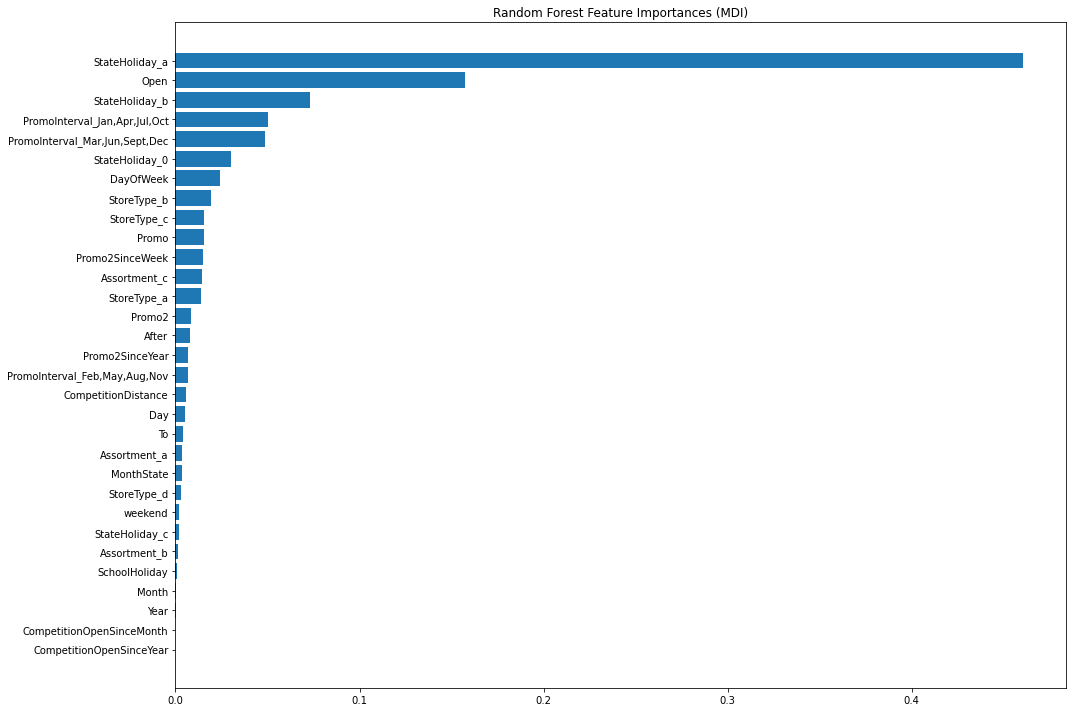

In [154]:
ohe = (clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]
feature_names = np.r_[feature_names, max_features]

tree_feature_importances = (
    clf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()


In [158]:

logged_model = 'runs:/a51ed4226c684518a93c953976e02c73/best_estimator'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)

# Predict on a Pandas DataFrame.
loadedPrediction=loaded_model.predict(X_test)

error=mean_squared_error(y_test,loadedPrediction)


print("mean_squared_error of model is ",error)

mean_squared_error of model is  5992877.187413464
